# STEP 5

2-D Linear Convection

The PDE governing 2-D Linear Convection is written as

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

Discretized equation of the above PDE is as shown below,
$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

Writing the above equation in terms of the unknown, 
$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

The above equation is solved with the below initial conditions,
$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for}  0.5 \leq x, y \leq 1 \cr
1\ \text{for}  \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:
    $$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
nx=81
ny=81
nt=100
dx=2/(nx-1)
dy=2/(ny-1)
c=1
sigma=0.2
dt=sigma*dx
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,2,ny)
u=numpy.ones((ny,nx))
un=numpy.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(.5/dy):int(1/dy+1)]=2
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

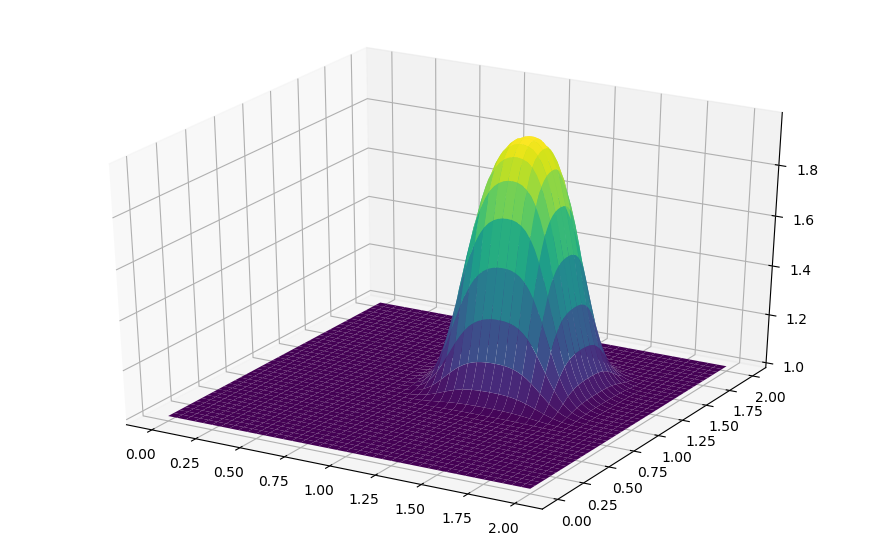

In [2]:
un=numpy.ones((ny,nx))
u[int(.5/dy):int(1/dy+1),int(.5/dy):int(1/dy+1)]=2
for t in range(nt+1):
    un=u.copy()
    row,col=u.shape
    for j in range(1,row):
        for i in range(1,col):
            u[j,i]=un[j,i]-(c*(dt/dx)*(un[j,i]-un[j,i-1]))-(c*(dt/dy)*(un[j,i]-un[j-1,i]))
            u[0,:]=u[:,0]=u[-1,:]=u[:,-1]=1
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)